In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp "/content/drive/MyDrive/Research Project/IT18220520/Test Data/kaggle.json" ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download jonathanoheix/face-expression-recognition-dataset

 87% 105M/121M [00:02<00:00, 53.0MB/s] 
100% 121M/121M [00:02<00:00, 48.7MB/s]


In [ ]:
!unzip "/content/face-expression-recognition-dataset.zip"

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

In [ ]:
picture_size = 48
folder_path = "/content/images/images/"

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
import tensorflow as tf

model = tf.keras.applications.MobileNet(
    weights=None,
    classes=7,
)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'],
  )

In [ ]:
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    mode='min',
    factor=0.1,
    patience=3,
    verbose=2,
)

In [ ]:
early_stop_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min',
    min_delta=0,
    patience=3,
    restore_best_weights=True,
    verbose=2,
)

In [ ]:
fit_history = model.fit(
    train_set,
    epochs=60,
    validation_data=test_set,
    callbacks=[
        lr_callback,
        early_stop_callback,
    ],
)

Epoch 1/60
226/226 [==============================] - 491s 2s/step - loss: 2.0636 - accuracy: 0.2335 - val_loss: 1.8288 - val_accuracy: 0.2586 - lr: 0.0100
Epoch 2/60
226/226 [==============================] - 475s 2s/step - loss: 1.8022 - accuracy: 0.2515 - val_loss: 2.1804 - val_accuracy: 0.2022 - lr: 0.0100
Epoch 3/60
226/226 [==============================] - 481s 2s/step - loss: 1.6788 - accuracy: 0.3140 - val_loss: 6.4748 - val_accuracy: 0.1134 - lr: 0.0100
Epoch 4/60
226/226 [==============================] - ETA: 0s - loss: 1.5183 - accuracy: 0.3935
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
Restoring model weights from the end of the best epoch: 1.
226/226 [==============================] - 479s 2s/step - loss: 1.5183 - accuracy: 0.3935 - val_loss: 2.7169 - val_accuracy: 0.1939 - lr: 0.0100
Epoch 4: early stopping


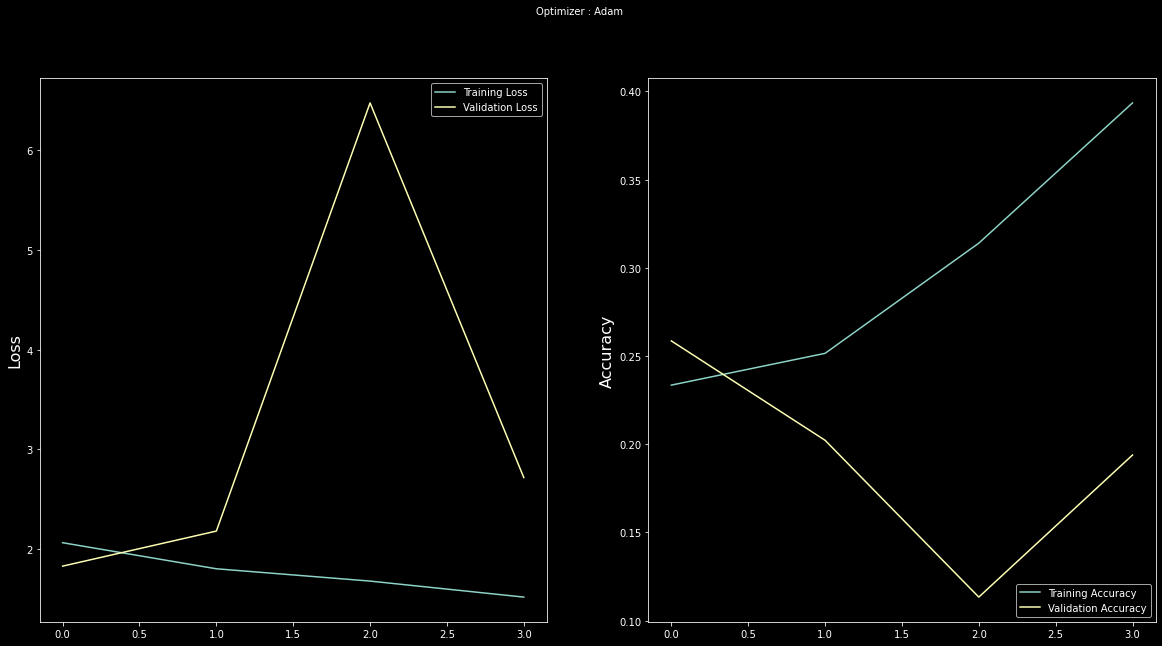

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(fit_history.history['loss'], label='Training Loss')
plt.plot(fit_history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(fit_history.history['accuracy'], label='Training Accuracy')
plt.plot(fit_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print(model.evaluate(test_set, verbose=0))
_, acc = model.evaluate(test_set, verbose=0)

[1.8288193941116333, 0.2585621178150177]
